# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [8]:
import pandas as pd

In [9]:
import numpy as np

In [10]:
import matplotlib.pyplot as plt

In [13]:
import statsmodels as sm

In [145]:

import matplotlib.pyplot as plt
import statsmodels as sm
import pylab as pl
import numpy as np
%matplotlib inline


### Step 2: Read in your data set 

In [53]:
#Read in data from source 
df_raw = pd.read_csv("collegeadmissions.csv")
df_raw.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


## Questions
#### Question 1. How many observations are in our dataset? 


In [75]:
df_raw.count()
#what's the difference between df_raw.count() and df_raw.count, df_raw.shape, df_raw.info

admit    400
gre      400
gpa      400
rank     400
dtype: int64

In [52]:
df_raw.shape

(400, 4)

Answer: There are 400 observations

#### Question 2. Create a summary table

In [ ]:
#function 

In [ ]:
df['dataframeName'].describe(), #reminder of formulas
df['columnName'].sum(),
df['columnName'].mean(),
df['columnName'].count(),
df['columnName'].skew(),
df.corr()

In [256]:
df_raw['admit'].sum()

127

In [257]:
df_raw['admit'].mean()

0.3175

In [258]:
df_raw['gpa'].sum() 

1355.9600000000007

In [259]:
df_raw['gre'].std() 

115.51653637223819

In [260]:
df_raw['gpa'].std() 

0.38056677163038394

In [71]:
df_raw.describe() #summary table

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


#### Question 3. Why would GRE have a larger STD than GPA?

In [113]:
df_raw.std()

admit      0.466087
gre      115.516536
gpa        0.380567
rank       0.944460
dtype: float64

Answer: The scaling is different which makes the GRE have a larger STD than GPA. One is mesured on a 1.0 to 4.0 and the other is measured from 200 to 800.    



#### Question 4. Drop data points with missing data


In [261]:
admissions.dropna().isnull().apply(sum, axis = 0)

admit    0
gre      0
gpa      0
rank     0
dtype: int64

In [262]:
df_raw.dropna().isnull().apply(sum, axis = 0)

admit    0
gre      0
gpa      0
rank     0
dtype: int64

In [263]:
admissions.dropna(how = "any", inplace = True) #nothing happened

In [264]:
admissions.shape

(400, 4)

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [265]:
admissions.dropna().isnull().apply(sum, axis = 0)

admit    0
gre      0
gpa      0
rank     0
dtype: int64

In [266]:
df_raw.dropna(how = 'any', inplace = True)

Answer: This command test if any entries are Null (isnull). True = a row contains missing values. 

#### Question 6. Create box plots for GRE and GPA

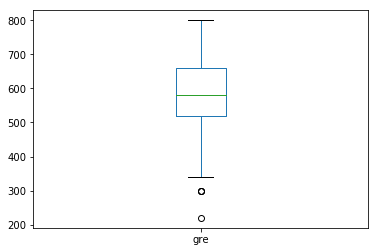

In [136]:
df_raw.gre.plot(kind='box')#boxplot 1

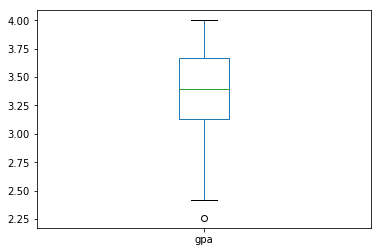

In [137]:
df_raw.gpa.plot(kind='box')#boxplot 2 

#### Question 7. What do this plots show?

Answer: In the GRE plot it shows there were some scores that were below 300, 75% of them had scores 660 or higher with a max of 800, and 50% of them scored 550 or above with a max of 800. There are some outliers that can effect the mean.

Answer: In the GPA plot it shows that 50% of the test takers had a GPA of 3.395 or above. And 75% of the test takers had a GPA of 3.67 or above. There are also an outlier that has a GPA of 2.26 which makes it less than normal. Based on the box whiskers plot it doesn't look like normal distribution. Also, the data may not be reliable because the test takers may not have been  measured on the same type of course work/scale. Meanawhile in the GRE plot the test takers were tested on the same information and format. 

#### Question 8. Describe each distribution 


In [ ]:
#plot the distribution of each variable

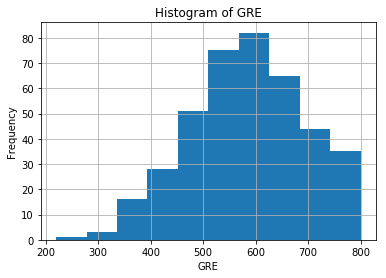

In [252]:
df_raw['gre'].hist() #the entry I emailed you 
pl.title('Histogram of GRE')
pl.xlabel('GRE')
pl.ylabel('Frequency')
pl.show()

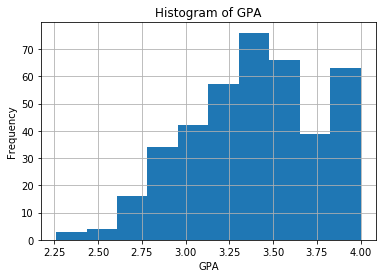

In [199]:
df_raw['gpa'].hist() ##the entry I emailed you 
pl.title('Histogram of GPA')
pl.xlabel('GPA')
pl.ylabel('Frequency')
pl.show()

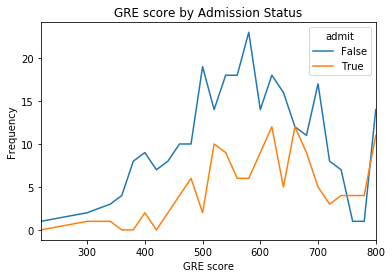

In [255]:
pd.crosstab(df_raw.gre, df_raw.admit.astype(bool)).plot(kind='line') ##the entry I emailed you 
pl.title('GRE score by Admission Status')
pl.xlabel('GRE score',)
pl.ylabel('Frequency') 
pl.show()

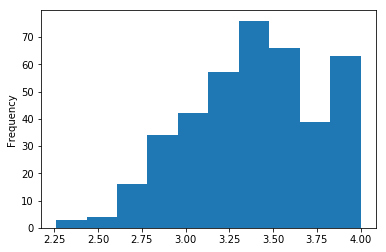

In [254]:
df_raw.gpa.plot(kind='hist') #testing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C1E76CB710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001C1E8C64A58>]], dtype=object)

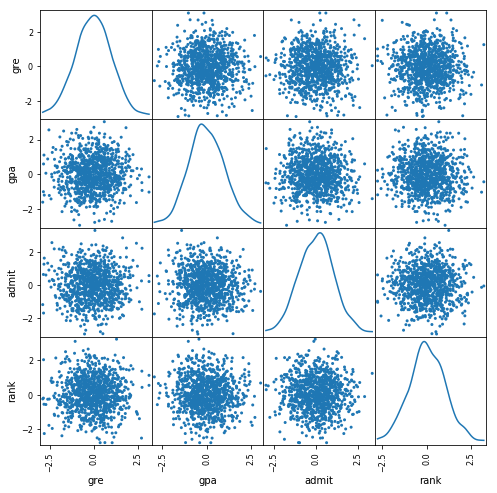

In [227]:
from pandas.plotting import scatter_matrix ###testing
df = pd.DataFrame(np.random.randn(1000, 4), columns=['gre', 'gpa', 'admit', 'rank'])
scatter_matrix(df, alpha=1, figsize=(8, 8), diagonal='kde')

admit
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: gpa, dtype: object

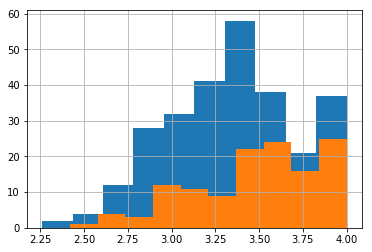

In [247]:
df_raw.groupby('admit').gpa.hist()

admit
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: gre, dtype: object

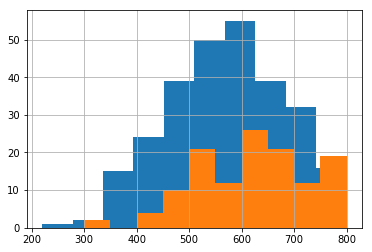

In [248]:
df_raw.groupby('admit').gre.hist()

<function matplotlib.pyplot.show>

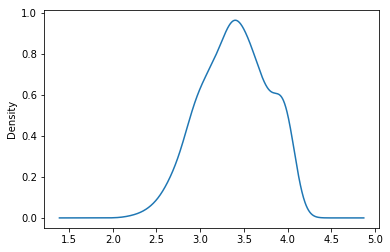

In [240]:
df_raw.gpa.plot(kind= 'kde', by = 'gpa')
plt.show

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: 

#### Question 11. Which of our variables are potentially colinear? 

In [ ]:
# create a correlation matrix for the data
correlation = admissions.corr()



fig = plt.figure()

ax = fig.add_subplot(111)

cax = ax.matshow(correlation, vmin=-1, vmax=1)

fig.colorbar(cax)

ticks = np.arange(0,9,1)

plt.show()

#### Question 12. What did you find?

Answer: 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 

#### Question 14. What is your hypothesis? 

Answer: 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data